<a href="https://colab.research.google.com/github/hsallrounder/Algorithm-For-Intelligent-Systems-And-Robotics-Lab/blob/master/Deep_Learning_with_Tensorflow_2_0_Tutorial_Getting_Started_with_Tensorflow_2_0_and_Keras_for_Beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Learning with Tensorflow 2.0 Tutorial - Getting Started with Tensorflow 2.0 and Keras for Beginners

### What is Tensorflow?

Tensorflow architecture works in three parts:

- Preprocessing the data
- Build the model
- Train and estimate the model

I am assuming that you know a little about the machine learning and deep learning

### Why Every Data Scientist Learn Tensorflow 2.x not Tensorflow 1.x

- API Cleanup
- Eager execution
- No more globals
- Functions, not sessions (session.run())
- Use Keras layers and models to manage variables
- It is faster
- It takes less space
- More consistent
- and many more, watch Google I/O https://www.youtube.com/watch?v=lEljKc9ZtU8
- Github Link: https://github.com/tensorflow/tensorflow/releases

 ##### !pip install tensorflow==2.0.0-rc0 
 ##### !pip install tensorflow-gpu==2.0.0-rc0

## Import the Fashion MNIST dataset

[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.8.2


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist = keras.datasets.fashion_mnist

In [5]:
type(mnist)

module

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [7]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [8]:
np.max(X_train)

255

In [9]:
np.mean(X_train)

72.94035223214286

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

#### Data Exploration

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

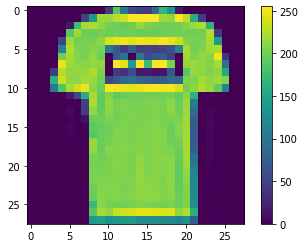

In [14]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [15]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
X_train = X_train/255.0

In [17]:
X_test = X_test/255.0

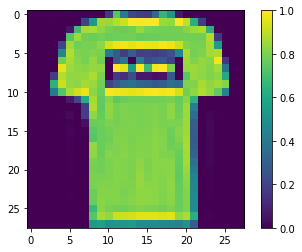

In [18]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

### Build the model with TF 2.0 

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Flatten, Dense,Conv2D, MaxPool2D, Dropout

In [20]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=[28,28,1]))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
#model.add(Dropout(0.5))
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
#model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax',kernel_regularizer='l2'))
#for binary output we use sigmoid function

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
__________________________________________________

#### model compilation
- Loss Function
- Optimizer
- Metrics

In [22]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])
#here adam is a gradient descent optimizer

In [23]:
history=model.fit(X_train, y_train, epochs = 10,validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 18s 3ms/step - loss: 0.4659 - sparse_categorical_accuracy: 0.8606 - val_loss: 0.3598 - val_sparse_categorical_accuracy: 0.8850
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3129 - sparse_categorical_accuracy: 0.9000 - val_loss: 0.3181 - val_sparse_categorical_accuracy: 0.8949
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2691 - sparse_categorical_accuracy: 0.9132 - val_loss: 0.3037 - val_sparse_categorical_accuracy: 0.9004
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2402 - sparse_categorical_accuracy: 0.9214 - val_loss: 0.2899 - val_sparse_categorical_accuracy: 0.9006
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2171 - sparse_categorical_accuracy: 0.9297 - val_loss: 0.2658 - val_sparse_categorical_accuracy: 0.9105
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1972 - spar

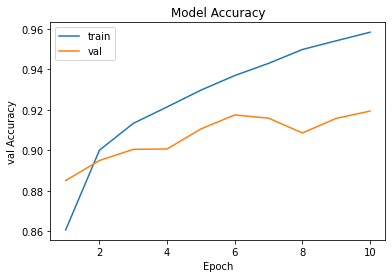

In [24]:
from matplotlib import pyplot as plt
epoch_range=range(1, 11)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('val Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

In [25]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2594 - sparse_categorical_accuracy: 0.9193
0.9193000197410583


In [26]:
from sklearn.metrics import accuracy_score

In [27]:
y_pred = model.predict(X_test)

In [28]:
y_pred

array([[1.7101354e-05, 2.1243151e-05, 9.3779108e-06, ..., 5.2491034e-04,
        1.4318249e-05, 9.9931049e-01],
       [3.8365601e-05, 1.4203734e-09, 9.9995124e-01, ..., 6.6167679e-08,
        8.5375005e-09, 2.5336268e-08],
       [1.6133097e-07, 9.9999988e-01, 4.8355440e-09, ..., 2.2146564e-11,
        7.3899940e-09, 3.1377909e-10],
       ...,
       [3.1036776e-05, 1.5871117e-06, 3.6821302e-06, ..., 1.0158411e-05,
        9.9961013e-01, 1.1318485e-05],
       [7.7632372e-08, 9.9999940e-01, 4.7360867e-08, ..., 2.0223032e-10,
        7.7271251e-10, 2.2810058e-08],
       [1.7894087e-03, 2.4040029e-03, 7.9570627e-03, ..., 2.9149172e-01,
        1.5482994e-02, 5.4826606e-03]], dtype=float32)

In [29]:
y_pred[0]

array([1.7101354e-05, 2.1243151e-05, 9.3779108e-06, 8.0208638e-06,
       8.7023227e-06, 7.5288735e-05, 1.0586126e-05, 5.2491034e-04,
       1.4318249e-05, 9.9931049e-01], dtype=float32)

In [30]:
class_names

['top',
 'trouser',
 'pullover',
 'dress',
 'coat',
 'sandal',
 'shirt',
 'sneaker',
 'bag',
 'ankle boot']

In [31]:
np.argmax(y_pred[0])

9

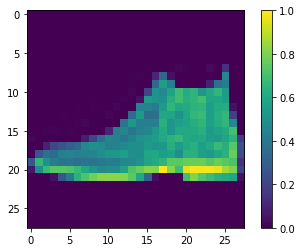

In [32]:
plt.figure()
plt.imshow(X_test[0])
plt.colorbar()

In [33]:
y_pred[1]

array([3.8365601e-05, 1.4203734e-09, 9.9995124e-01, 5.2589246e-07,
       9.6676958e-06, 6.2068950e-09, 2.0077390e-07, 6.6167679e-08,
       8.5375005e-09, 2.5336268e-08], dtype=float32)

In [34]:
np.argmax(y_pred[1])

2